## 프로젝트 주제: ESG 뉴스 분석
*네이버 뉴스에서 ESG 뉴스 데이터 수집, csv 파일 생성 및 활용, 형태소 분석 기반 worldcloud 그리기*

**제안 배경**

```
# 세계 최대 자산운용사 블랙락은 "지속가능성을 투자기준으로 삼겠다"라고 말했습니다. 
이처럼 ESG(환경, 사회, 지배구조)는 기업을 평가하는 비재무적인 지표로 떠오르고 있으며, ESG 기반 투자 자산은 빠르게 증가하고 있습니다. 
그리하여 ESG에 대하여 프로젝트를 진행해보면서 관련 토픽에 대하여 알아보고, 추후 기말 프로젝트에서 텍스트마이닝 기반 ESG 요소 평가 시스템을 만들어보려고 합니다.
```

**구현 프로젝트**
```
# 네이버뉴스에서 ESG 관련 뉴스를 스크래핑해서 언론사, 제목, 기사내용, url을 csv 파일로 만들었습니다. 
그 다음, csv 파일을 업로드하여 뉴스 제목과 기사 내용 일부를 가지고 각각 Kkma와 Twitter를 사용하여 분석하고, 워드클라우드를 생성하였습니다.
뉴스 제목으로 워드클라우드를 만들 때는 나뭇잎 이미지를 가져와서 실루엣처럼 활용하여 만들어보았습니다.
```
 

**프로젝트 진행 방향**
```
# 앞으로 기말 프로젝트는 현 프로젝트에서 확장하여 진행하려고 합니다. 
E, S, G 관련 용어 딕셔너리를 구축한 뒤, 용어가 뉴스에 나올 경우, 문장의 긍/부정을 분석하여 ESG에 반영하려고 합니다.
즉, 뉴스기사 AI 분석을 통하여 ESG 요소를 파악하는 서비스를 구축해보려고 합니다. 
이를 통하여 실제로 활용가능한 프로그램을 만들어보는 것이 이번 학기의 목표입니다.
```

## 목차
### 1. ESG 뉴스 스크래핑하기
### 2. csv 파일 열어서 데이터 분석하고 wordcloud 그리기
#### (1) ESG 제목 데이터로 wordcloud 그리기
#### (2) ESG 기사 내용 데이터로 wordcloud 그리기
```
(2)-1 ESG 기사 내용 [명사] wordcloud 그리기
(2)-2 ESG 기사 내용 [형용사] wordcloud 그리기
(2)-3 ESG 기사 내용 [동사] wordcloud 그리기
```



In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 460kB 65.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (50.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
# 패키지 불러오기
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt       

from collections import Counter

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

## 1. ESG 뉴스 스크래핑하기

In [ ]:
# 해드라인 검색 및 추출 함수를 정의
t_list = []

def web_scraping(keyword, end, start = 1): 
    # 네이버 뉴스 url의 특성을 고려하여 추가된 수식
    end = (end-1)*10 + 1
        
    while 1:
        
        if start > end :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query={0}&start={1}'.format(keyword,start)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')
        
        news_titles = page.find_all(attrs='news_tit')
        medias = page.find_all(attrs='info press') 
        texts = page.find_all('a', attrs='api_txt_lines dsc_txt_wrap')

        # 검색 결과 중에서 큰 제목 & 해당 사이트 주소 추출 
        ablist=[] 
        for one in news_titles :
            a = one.attrs['title']
            b = one.attrs['href']
            ablist.append([a, b])
        
        # 언론사 추출
        i = 0
        for one in medias :
            c = one.text
            ablist[i].insert(0, c)
            i += 1

        # 기사 본문 내용 일부 추출
        j = 0
        for one in texts :
            d = one.text
            ablist[j].insert(2, d)
            j += 1
        
        t_list.append(ablist)
        
        start += 10

In [ ]:
# 검색어를 ESG로 설정 

#keyword = input('검색어를 입력하세요 : ')
keyword = 'ESG'
print()

In [ ]:
# 마지막 페이지를 1000으로 설정
#end_page = int(input('마지막 페이지 번호를 입력하세요 : '))
end_page = 1000
web_scraping(keyword, end_page)       # end_page 페이지 까지 스크래핑

In [ ]:
# 총 1000 페이지 스크래핑함
len(t_list)

1000

In [ ]:
# 한 페이지 당 10개의 기사가 있음. 이를 t_list 안에 리스트로 넣어놓음
t_list[0]

[['연합뉴스',
  '한국투자증권, 이사회 산하 ESG위원회 신설',
  '한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책을 수립하는 ESG위원회 설립을 의결했다고 10일 밝혔다. ESG위원회는 정일문 한국투자증권 사장, 김태원 구글코리아 전무, 조영태...',
  'http://yna.kr/AKR20210510070500002?did=1195m'],
 ['뉴시스',
  '"ESG, 궁금증 풀어드립니다"…대한상의, \'ESG 뉴스레터\'',
  "최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해할 수 있도록 대한상공회의소가 매달 ESG 관련 정보를 기업들에게 제공한다. 대한상공회의소는 이달부터 회원사들을 대상으로 'ESG...",
  'http://www.newsis.com/view/?id=NISX20210510_0001435205&cID=13001&pID=13000'],
 ['뉴스1',
  'SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화',
  'SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG 경영도 강화한다. 앞으로 강화될 것으로 예상되는 IMO(국제해사기구)의 환경규제에 신속하게 대응해 나가는 한편 해운사, 협력업체, 항만...',
  'https://www.news1.kr/articles/?4300919'],
 ['파이낸셜뉴스',
  'SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"',
  '김윤옥 SK하이닉스 지속경영담당(부사장)은 "환경·사회·지배구조(ESG) 경영을 강화하고 사회적 가치 창출 규모를 키워가면서 인류와 사회에 기여하는 방법을 모색하겠다"고 전했다. 한편 SK 주요 관계사들은 지난...',
  'http://www.fnnews.com/news/202105101004151929'],
 ['서울경제',
  'ESG 경영 나선 한미글로벌···ESG 위원회 신설',
  '글로벌 건설사업관리(PM·Projec

In [ ]:
# 리스트 안 리스트를 꺼내서 각 페이지별로 리스트에 있는 것이 아니라 
#하나의 리스트 안에 모든 페이지 정보가 들어가도록 구성함 
t_list_final=[]

for k in t_list:
    for m in k:
        t_list_final.append(m)
print(len(t_list_final))

10000


In [ ]:
# csv 파일로 만들었음 ['media', 'title', 'text', 'url']

df = pd.DataFrame(t_list_final)
df.columns = ['media', 'title', 'text', 'url']
df.head()

media                               title  \
0    연합뉴스            한국투자증권, 이사회 산하 ESG위원회 신설   
1     뉴시스  "ESG, 궁금증 풀어드립니다"…대한상의, 'ESG 뉴스레터'   
2     뉴스1  SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화   
3  파이낸셜뉴스  SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"   
4    서울경제        ESG 경영 나선 한미글로벌···ESG 위원회 신설   

                                                text  \
0  한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책...   
1  최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해...   
2  SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG...   
3  김윤옥 SK하이닉스 지속경영담당(부사장)은 "환경·사회·지배구조(ESG) 경영을 강...   
4  글로벌 건설사업관리(PM·Project Management) 기업 한미글로벌이 이사...   

                                                 url  
0       http://yna.kr/AKR20210510070500002?did=1195m  
1  http://www.newsis.com/view/?id=NISX20210510_00...  
2             https://www.news1.kr/articles/?4300919  
3      http://www.fnnews.com/news/202105101004151929  
4        https://www.sedaily.com/NewsView/22MB1W23RG

In [ ]:
# 데이터프레임을 csv로 변환하여 저장함
df.to_csv('C:\\Users\\user\\Documents\\web_text_mining_ewha\\esg_news.csv')

## 2. csv 파일 열어서 데이터 분석하고 wordcloud 그리기
### (1) ESG 제목 데이터로 wordcloud 그리기

In [ ]:
# esg_news 데이터 업로드하기
from google.colab import files
file_uploaded = files.upload()

Saving esg_news.csv to esg_news.csv


In [ ]:
# csv 파일 dataframe으로 열기
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(file_uploaded['esg_news.csv']))

df2.head()

Unnamed: 0  ...                                                url
0           0  ...       http://yna.kr/AKR20210510070500002?did=1195m
1           1  ...  http://www.newsis.com/view/?id=NISX20210510_00...
2           2  ...             https://www.news1.kr/articles/?4300919
3           3  ...      http://www.fnnews.com/news/202105101004151929
4           4  ...        https://www.sedaily.com/NewsView/22MB1W23RG

[5 rows x 5 columns]

In [ ]:
# 데이터 분석을 위하여 데이터프레임에서 제목만 추출함
title_li = df2['title'].to_list()
title_li

['한국투자증권, 이사회 산하 ESG위원회 신설',
 '"ESG, 궁금증 풀어드립니다"…대한상의, \'ESG 뉴스레터\'',
 'SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화',
 'SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"',
 'ESG 경영 나선 한미글로벌···ESG 위원회 신설',
 '4월 ESG채권 발행 11.3兆…전월대비 43% `급증`',
 '부산항만공사,항만 공기업 최초 ESG 경영추진 선포',
 '한미글로벌, ESG 경영 본격 박차',
 '남부발전, ESG 경영 실천 위한 대국민 혁신 아이디어 공모',
 '"디지털 혁신·ESG 투자 등 새로운 가치 잇는 금융투자 파트너로 도약"',
 '한국금융미래포럼, ESG 가이드 제시',
 '1000만원 탄 논문 뭔가 보니…스타트업·ESG',
 '한미글로벌, ESG 경영 본격 박차',
 '문승욱, 마켓컬리 물류센터 방문...”유통 환경·안전 등 ESG 확산 지원”',
 '남부발전, ESG 경영 실천 위한 대국민 혁신 아이디어 공모',
 '\'ESG 경영\' 힘주는 SK하이닉스…"지난해 경제간접 기여성과 5조 넘어"',
 '‘탈(脫) 플라스틱’ 나선 기업들… ESG 경영 속도 낸다',
 'SM상선 "연내 증시 입성···노선확장·ESG경영 강화"',
 '우리은행, 종이절약 캠페인 및 대고객 이벤트로 ESG경영 실천한다',
 "고용부, 내달 11일까지 ESG 경영 확산 '100초 영상' 공모전",
 '[ESF 2021]"ESG發 산업 격변…기업 성장분야 바뀐다"',
 '한화솔루션, ESG 확산 위한 상생협력 MOU 체결',
 '"회장님들 몸소 실천" ESG 경영 강화에 다시 부는 챌린지 바람',
 "KB국민카드, 3억달러 지속가능채권 발행…'ESG경영 선도'",
 '최고경영자 20여명 제주서 ESG 열공',
 '글로벌 큰손 “ESG 경영” 요구 커진다',
 '한국남부발전, ESG경영위원회 신설…해상풍력단지 건설 추진',
 '[김화진 칼럼] ESG와 주주행동주의',
 '"ESG 궁

In [ ]:
# Kkma로 형태소 분석
from konlpy.tag import Kkma

kkma = Kkma()

sentences_tag = []

for sentence in title_li:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('한국', 'NNG'), ('투자', 'NNG'), ('증권', 'NNG'), (',', 'SP'), ('이사회', 'NNG'), ('산하', 'NNG'), ('ESG', 'OL'), ('위원회', 'NNG'), ('신설', 'NNG')], [('"', 'SS'), ('ESG', 'OL'), (',', 'SP'), ('궁금증', 'NNG'), ('풀', 'VV'), ('어', 'ECD'), ('드리', 'VXV'), ('ㅂ니다', 'EFN'), ('"', 'SS'), ('…', 'SE'), ('대한', 'NNG'), ('상의', 'NNG'), (',', 'SP'), ("'", 'SS'), ('ESG', 'OL'), ('뉴스', 'NNG'), ('레터', 'NNG'), ("'", 'SS')], [('SM', 'OL'), ('상선', 'NNG'), (',', 'SP'), ('연내', 'NNG'), ('IPO', 'OL'), ('준비', 'NNG'), ('박차', 'NNG'), ('…', 'SE'), ('신', 'XPN'), ('사옥', 'NNG'), ('이전', 'NNG'), ('·', 'SP'), ('ESG', 'OL'), ('경영', 'NNG'), ('강화', 'NNG')], [('SK', 'OL'), ('하이닉스', 'NNP'), (',', 'SP'), ('작년', 'NNG'), ('사회적', 'NNG'), ('가치', 'NNG'), ('약', 'NNG'), ('5', 'NR'), ('조', 'NNG'), ('창출', 'NNG'), ('"', 'SS'), ('ESG', 'OL'), ('강화', 'NNG'), ('"', 'SS')], [('ESG', 'OL'), ('경영', 'NNG'), ('나서', 'VV'), ('ㄴ', 'ETD'), ('한미', 'NNG'), ('글로벌', 'NNG'), ('···', 'SW'), ('ESG', 'OL'), ('위원회', 'NNG'), ('신설', 'NNG')], [('4', 'NR'), ('월', 'NNM'), ('

In [ ]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence: #word와 tag 중에서 word 단어만
        if tag in ['NNG']:               
            noun_list.append(word)
            
print(noun_list)

['한국', '투자', '증권', '이사회', '산하', '위원회', '신설', '궁금증', '대한', '상의', '뉴스', '레터', '상선', '연내', '준비', '박차', '사옥', '이전', '경영', '강화', '작년', '사회적', '가치', '약', '조', '창출', '강화', '경영', '한미', '글로벌', '위원회', '신설', '채권', '발행', '전월', '대비', '급증', '부산항', '공사', '항만', '공기업', '최초', '경영', '추진', '선포', '한미', '글로벌', '경영', '본격', '남부', '발전', '경영', '실천', '위', '대국민', '혁신', '아이디어', '공모', '디지털', '혁신', '투자', '새', '가치', '금융', '투자', '파트너', '도약', '한국', '금융', '미래', '포럼', '이드', '제시', '논문', '스타트', '업', '한미', '글로벌', '경영', '본격', '문승', '마켓', '물류', '센터', '방문', '유통', '환경', '안전', '확산', '지원', '남부', '발전', '경영', '실천', '위', '대국민', '혁신', '아이디어', '공모', '경영', '지난해', '경제', '간접', '기여', '성과', '탈', '플라스틱', '기업', '경영', '속', '상선', '연내', '증시', '입성', '노선', '확장', '경영', '강화', '우리은행', '종이', '절약', '캠페인', '대', '고객', '이벤트', '경영', '실천', '고용', '부', '내달', '경영', '확산', '영상', '공모전', '산업', '격변', '기업', '성장', '분야', '한화', '솔루션', '확산', '위', '상생', '협력', '체결', '장님', '몸', '실천', '경영', '강화', '챌린지', '바람', '국민', '카드', '달러', '지속', '가능', '채권', '발행', '경영', '선도', '최고', '경영자

In [ ]:
# 명사 중에서 두음절 단어만 추출 

print('전체 명사의 수: ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출

print('두음절 이상의 명사의 수: ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 명사의 수:  67822

두음절 이상의 명사의 수:  61868

['한국', '투자', '증권', '이사회', '산하', '위원회', '신설', '궁금증', '대한', '상의', '뉴스', '레터', '상선', '연내', '준비', '박차', '사옥', '이전', '경영', '강화', '작년', '사회적', '가치', '창출', '강화', '경영', '한미', '글로벌', '위원회', '신설', '채권', '발행', '전월', '대비', '급증', '부산항', '공사', '항만', '공기업', '최초', '경영', '추진', '선포', '한미', '글로벌', '경영', '본격', '남부', '발전', '경영', '실천', '대국민', '혁신', '아이디어', '공모', '디지털', '혁신', '투자', '가치', '금융', '투자', '파트너', '도약', '한국', '금융', '미래', '포럼', '이드', '제시', '논문', '스타트', '한미', '글로벌', '경영', '본격', '문승', '마켓', '물류', '센터', '방문', '유통', '환경', '안전', '확산', '지원', '남부', '발전', '경영', '실천', '대국민', '혁신', '아이디어', '공모', '경영', '지난해', '경제', '간접', '기여', '성과', '플라스틱']


In [ ]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)
words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출
print(words)

[('경영', 4393), ('기업', 1552), ('위원회', 1508), ('채권', 1474), ('환경', 1450), ('발행', 1316), ('은행', 1306), ('금융', 1234), ('사회적', 1034), ('기술', 768), ('지원', 761), ('신설', 729), ('녹색', 728), ('한화', 712), ('규모', 703), ('공개', 655), ('하나', 655), ('확대', 635), ('출범', 626), ('개최', 595), ('뉴딜', 578), ('한국판', 570), ('우리은행', 559), ('도입', 556), ('가치', 555), ('선언', 551), ('본격화', 546), ('기금', 545), ('보증', 542), ('성과', 536), ('기차', 525), ('이사회', 522), ('정보', 522), ('개선', 521), ('공시', 516), ('무공해', 508), ('매장', 498), ('방안', 498), ('스타', 496), ('일회용', 496), ('가속도', 496), ('프리미엄', 495), ('산하', 494), ('시그널', 494), ('바이오', 494), ('토론회', 494), ('몸값', 493), ('경오', 493), ('측정', 493), ('중요', 491)]


In [ ]:
# 실루엣을 이용한 워드 클라우드를 위해 이미지 업로드
from google.colab import files
file_uploaded = files.upload()

Saving leaf.jpg to leaf.jpg


In [ ]:
# 워드 클라우드

import numpy as np                    
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from wordcloud  import ImageColorGenerator

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 실루엣 이미지 업로드
cloud_img = plt.imread('leaf.jpg')

# 워드 클라우드 세팅
wordcloud = WordCloud(font_path='NanumBarunGothic',
                      background_color='white',
                      random_state = 1,
                      color_func = ImageColorGenerator(cloud_img),   # img의 color 를 이용
                      mask = cloud_img)      # 그림 이미지에 맞게 그림 

print(dict(words))

{'경영': 4393, '기업': 1552, '위원회': 1508, '채권': 1474, '환경': 1450, '발행': 1316, '은행': 1306, '금융': 1234, '사회적': 1034, '기술': 768, '지원': 761, '신설': 729, '녹색': 728, '한화': 712, '규모': 703, '공개': 655, '하나': 655, '확대': 635, '출범': 626, '개최': 595, '뉴딜': 578, '한국판': 570, '우리은행': 559, '도입': 556, '가치': 555, '선언': 551, '본격화': 546, '기금': 545, '보증': 542, '성과': 536, '기차': 525, '이사회': 522, '정보': 522, '개선': 521, '공시': 516, '무공해': 508, '매장': 498, '방안': 498, '스타': 496, '일회용': 496, '가속도': 496, '프리미엄': 495, '산하': 494, '시그널': 494, '바이오': 494, '토론회': 494, '몸값': 493, '경오': 493, '측정': 493, '중요': 491}


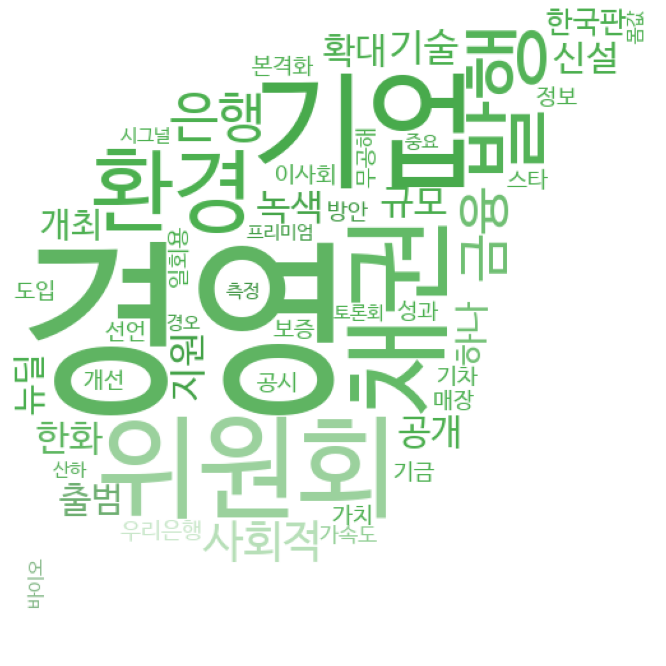

In [ ]:
# 워드클라우드 이미지 print
cloud = wordcloud.generate_from_frequencies(dict(words))  

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### (2) ESG 기사 내용 데이터로 wordcloud 그리기
#### (2)-1 ESG 기사 내용 [명사] wordcloud 그리기

In [ ]:
# 데이터 분석을 위하여 데이터프레임에서 '기사 내용 일부'만 추출함
title_li2 = df2['text'].to_list()
#title_li2

In [ ]:
# '기사 내용'의 형태소 분석을 하기 위해 리스트 변형
'''
'제목' 분석 시에는 형태소 분석 전에 별다른 변형/조작이 필요 없었는데, 
각 요소가 2개 이상의 문장으로 이루어진 경우, 형태소 분석기에서 인식을 하지 못하고 TypeError 오류가 남.
그래서 '기사 내용' 분석을 위해서는 문장 별로 잘라준 뒤에 형태소 분석을 해야됨.
'''

real_li = []
for j in range(10000):
  a=str(title_li2[j]).split('.')
  #print(a)
  sample_list = list(filter(None, a))
  real_li.append(sample_list)

In [ ]:
whole_li = []
for i in real_li:
  for j in i:
    whole_li.append(j)

print(whole_li[:5])

['한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책을 수립하는 ESG위원회 설립을 의결했다고 10일 밝혔다', ' ESG위원회는 정일문 한국투자증권 사장, 김태원 구글코리아 전무, 조영태', '최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해할 수 있도록 대한상공회의소가 매달 ESG 관련 정보를 기업들에게 제공한다', " 대한상공회의소는 이달부터 회원사들을 대상으로 'ESG", 'SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG 경영도 강화한다']


In [ ]:
# Kkma가 시간이 오래걸려서 '제목'보다 데이터 크기가 더 큰 '기사 내용 일부'를 분석할 때는 Twitter를 사용해봄 
# 형태소 분석

from konlpy.tag import Twitter
 
twitter = Twitter()
sentences_tag2 = []

for sentence2 in whole_li:
    word_tag2 = twitter.pos(sentence2)
    sentences_tag2.append(word_tag2)

sentences_tag2

[[('한국', 'Noun'),
  ('투자', 'Noun'),
  ('증권', 'Noun'),
  ('은', 'Josa'),
  ('이사회', 'Noun'),
  ('를', 'Josa'),
  ('열고', 'Verb'),
  ('환경', 'Noun'),
  ('·', 'Punctuation'),
  ('사회', 'Noun'),
  ('·', 'Punctuation'),
  ('지배구조', 'Noun'),
  ('(', 'Punctuation'),
  ('ESG', 'Alpha'),
  (')', 'Punctuation'),
  ('경영', 'Noun'),
  ('의', 'Josa'),
  ('기본', 'Noun'),
  ('전략', 'Noun'),
  ('및', 'Noun'),
  ('정책', 'Noun'),
  ('을', 'Josa'),
  ('수립', 'Noun'),
  ('하는', 'Verb'),
  ('ESG', 'Alpha'),
  ('위원회', 'Noun'),
  ('설립', 'Noun'),
  ('을', 'Josa'),
  ('의결', 'Noun'),
  ('했다고', 'Verb'),
  ('10일', 'Number'),
  ('밝혔다', 'Verb')],
 [('ESG', 'Alpha'),
  ('위원회', 'Noun'),
  ('는', 'Josa'),
  ('정일', 'Noun'),
  ('문', 'Noun'),
  ('한국', 'Noun'),
  ('투자', 'Noun'),
  ('증권', 'Noun'),
  ('사장', 'Noun'),
  (',', 'Punctuation'),
  ('김태원', 'Noun'),
  ('구글', 'Noun'),
  ('코리아', 'Noun'),
  ('전무', 'Noun'),
  (',', 'Punctuation'),
  ('조', 'Modifier'),
  ('영태', 'Noun')],
 [('최근', 'Noun'),
  ('기업', 'Noun'),
  ('들', 'Suffix'),
  ('의', 'Jos

In [ ]:
# 형태소 분석 후 명사만 추출
noun_list2 = []

for sentence2 in sentences_tag2:
    for word2, tag2 in sentence2:
        if tag2 in ['Noun']:               
            noun_list2.append(word2)

print('명사 추출')            
print(noun_list2)

['한국', '투자', '증권', '이사회', '환경', '사회', '지배구조', '경영', '기본', '전략', '및', '정책', '수립', '위원회', '설립', '의결', '위원회', '정일', '문', '한국', '투자', '증권', '사장', '김태원', '구글', '코리아', '전무', '영태', '최근', '기업', '관심', '도', '환경', '사회', '지배구조', '대해', '이해', '수', '상공회의소', '매달', '관련', '정보', '기업', '제공', '상공회의소', '달', '회원', '사', '대상', '상선', '환경', '노동', '인권', '윤리', '사회', '공헌', '등', '지속', '투자', '전개', '경영', '앞', '강화', '것', '예상', '국제', '기구', '의', '환경', '규제', '대응', '한편', '해운', '사', '협력', '업체', '항만', '김윤옥', '하이닉스', '담당', '부사', '은', '환경', '사회', '지배구조', '경영', '사회', '가치', '창', '규모', '인류', '사회', '기여', '방법', '모색', '고', '전', '한편', '주요', '관계', '사', '지난', '글로벌', '건설', '사업', '관리', '기업', '한미글로벌', '이사회', '사내', '각각', '조직', '신설', '환경', '사회', '지배구조', '경영', '한미글로벌', '최근', '이사회', '내', '경영', '컨트롤', '타워', '역할', '발행', '채권', '개', '종목', '전월', '대비', '나', '채권', '발행', '전월', '대비', '나', '녹색', '채권', '현대', '캐피탈', '부산', '항만', '공사', '본사', '부산', '중앙', '항만', '공기업', '처음', '경영', '추진', '선포', '개최', '본격', '경영', '환경', '사회', '지배구조', '사진', '한미글로벌', '건설', '사업', '관

In [ ]:
# 명사 중에서 두음절 단어만 추출 
print('전체 명사의 수: ', len(noun_list2))
print() 

noun_list2 = [word for word in noun_list2 if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출

print('두음절 이상의 명사의 수: ', len(noun_list2))
print() 

print('처음 나오는 순서대로 100개 출력: ')
print(noun_list2[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 명사의 수:  252827

두음절 이상의 명사의 수:  225589

['한국', '투자', '증권', '이사회', '환경', '사회', '지배구조', '경영', '기본', '전략', '정책', '수립', '위원회', '설립', '의결', '위원회', '정일', '한국', '투자', '증권', '사장', '김태원', '구글', '코리아', '전무', '영태', '최근', '기업', '관심', '환경', '사회', '지배구조', '대해', '이해', '상공회의소', '매달', '관련', '정보', '기업', '제공', '상공회의소', '회원', '대상', '상선', '환경', '노동', '인권', '윤리', '사회', '공헌', '지속', '투자', '전개', '경영', '강화', '예상', '국제', '기구', '환경', '규제', '대응', '한편', '해운', '협력', '업체', '항만', '김윤옥', '하이닉스', '담당', '부사', '환경', '사회', '지배구조', '경영', '사회', '가치', '규모', '인류', '사회', '기여', '방법', '모색', '한편', '주요', '관계', '지난', '글로벌', '건설', '사업', '관리', '기업', '한미글로벌', '이사회', '사내', '각각', '조직', '신설', '환경', '사회', '지배구조']


In [ ]:
# 단어의 출현 횟수 카운트

counts2 = Counter(noun_list2)
words2 = counts2.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출
print('가장 많이 출현한 횟수 순으로 50개 추출: ')
print(words2)

[('경영', 10367), ('사회', 7754), ('환경', 7153), ('지배구조', 6045), ('채권', 5768), ('기업', 5100), ('발행', 2755), ('위해', 2751), ('위원회', 2573), ('금융', 2482), ('친환경', 2270), ('그룹', 2229), ('이번', 2142), ('지원', 2017), ('녹색', 2007), ('개선', 1724), ('글로벌', 1672), ('협약', 1645), ('공개', 1592), ('확대', 1556), ('정보', 1549), ('관련', 1488), ('지난', 1418), ('한국', 1390), ('한화', 1298), ('사업', 1255), ('책임', 1225), ('뉴딜', 1188), ('업계', 1161), ('목적', 1158), ('한국판', 1158), ('우리은행', 1123), ('실천', 1121), ('공시', 1082), ('지주', 1077), ('하나', 1065), ('이사회', 1028), ('방안', 1016), ('기술', 1009), ('캠코', 1007), ('특수', 1002), ('바람', 996), ('대세', 995), ('기관', 993), ('토론회', 991), ('프리미엄', 989), ('바이오', 987), ('매장', 986), ('제약', 984), ('탄소', 954)]


In [ ]:
# 워드 클라우드 (colormap style을 BrBG로 변경)
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

#폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

wordcloud = WordCloud(font_path='NanumBarunGothic',
                      colormap = 'BrBG',
                      width=600,
                      height=600)

print('딕셔너리 형태 출력')
print(dict(words2))

{'경영': 10367, '사회': 7754, '환경': 7153, '지배구조': 6045, '채권': 5768, '기업': 5100, '발행': 2755, '위해': 2751, '위원회': 2573, '금융': 2482, '친환경': 2270, '그룹': 2229, '이번': 2142, '지원': 2017, '녹색': 2007, '개선': 1724, '글로벌': 1672, '협약': 1645, '공개': 1592, '확대': 1556, '정보': 1549, '관련': 1488, '지난': 1418, '한국': 1390, '한화': 1298, '사업': 1255, '책임': 1225, '뉴딜': 1188, '업계': 1161, '목적': 1158, '한국판': 1158, '우리은행': 1123, '실천': 1121, '공시': 1082, '지주': 1077, '하나': 1065, '이사회': 1028, '방안': 1016, '기술': 1009, '캠코': 1007, '특수': 1002, '바람': 996, '대세': 995, '기관': 993, '토론회': 991, '프리미엄': 989, '바이오': 987, '매장': 986, '제약': 984, '탄소': 954}


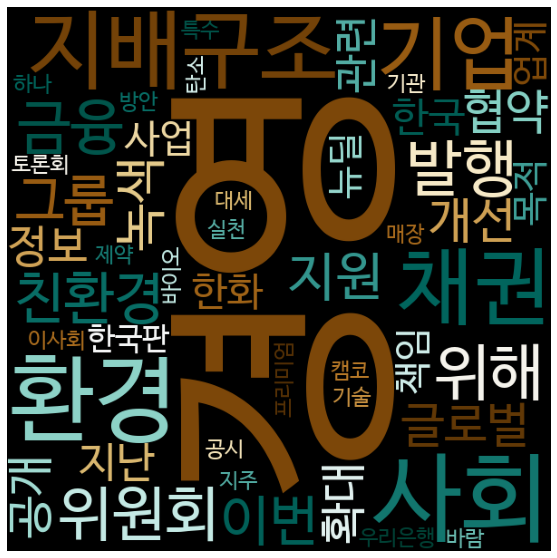

In [ ]:
# 워드 클라우드 print
'''
'제목' 분석 시 이미지를 불러와 실루엣 방법을 사용함.
'기사 내용' 분석 시에는 일반적인 워드 클라우드를 사용하고, colormap 색을 ESG를 표현할 수 있는 색으로 선택함.
'''

cloud = wordcloud.generate_from_frequencies(dict(words2))
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(10, 10))
plt.axis('off')   
plt.imshow(cloud)
plt.show()

# (추가 실험) 명사만이 아니라 형용사와 동사 분석도 유의미할까?

## (2)-2 ESG 기사 내용 [형용사] wordcloud 그리기
### 세 음절 이상 추출, 불용어 필터링

In [ ]:
# 불용어 작업을 위하여 미리 업로드해놓음
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
# 형태소 분석 후 형용사만 추출

adj_list = []

for sentence3 in sentences_tag2:
    for word3, tag3 in sentence3: 
        if tag3 in ['Adjective']:               
            adj_list.append(word3)

print('형용사 추출: ')        
print(adj_list)

형용사 추출: 
['있는', '있도록', '강화한다', '신속하게', '강화하고', '강화한다', '강화한다', '있는', '새로운', '가능한', '아닌', '있다', '강화한다', '있는', '강화함과', '있다', '중요한', '있는', '다양한', '자리매', '있도록', '있는', '거세지고', '있다', '있도록', '많은', '있는', '명확하다', '의해', '같은', '있기', '불편한', '있는', '다양한', '있다', '새로운', '새로운', '아름다운', '있다', '뜨거운', '넘쳐', '새로운', '아니다', '있을까', '희', '있지만', '어떻게', '많다', '아닙니다', '심각한', '미치죠', '그렇기', '아니라는', '있다', '높은', '필요하다는', '있다는', '성장할', '가능한', '있으며', '있다', '같은', '있다', '충실하게', '아닌', '있다', '있다', '있다', '필요한', '높은', '있는', '좋은', '있다', '가능한', '화할', '있는', '의해', '강화한다', '있으며', '있는', '있습니다', '중요하다고', '아름다운', '가능한', '자세한', '있던', '있다', '새로운', '있다', '가능한', '있다', '좋은', '강화하는', '인한', '가능한', '있어야', '이러한', '있다', '가능한', '없는', '있다', '빠르고', '유연한', '중요한', '새로', '강화하겠다는', '자세한', '가능한', '까다로운', '많은', '있는', '명확하다', '의해', '있다', '있다', '같은', '있기', '불편한', '자리매', '불편한', '있는', '다양한', '있다', '있고', '새로운', '새로운', '자리매', '있다', '뜨거운', '넘쳐', '새로운', '아니다', '있다', '있을까', '희', '있지만', '어떻게', '많다', '아닙니다', '심각한', '미치죠', '그렇기', '강화한다고', '아니라는', '자리매', '있다', '있다

In [106]:
# 형용사 중에서 세 음절 이상 단어만 추출
print('전체 형용사의 수: ', len(adj_list))
print() 

adj_list = [word for word in adj_list if len(word) > 2]    # 명사중에서 세 음절 이상의 단어  추출

print('세음절 이상의 형용사의 수: ', len(adj_list))
print() 

print('처음 나오는 순서대로 100개 출력: ')
print(adj_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 형용사의 수:  8014

세음절 이상의 형용사의 수:  5049

처음 나오는 순서대로 100개 출력: 
['있도록', '강화한다', '신속하게', '강화하고', '강화한다', '강화한다', '새로운', '가능한', '강화한다', '강화함과', '중요한', '다양한', '자리매', '있도록', '거세지고', '있도록', '명확하다', '불편한', '다양한', '새로운', '새로운', '아름다운', '뜨거운', '새로운', '아니다', '있을까', '있지만', '어떻게', '아닙니다', '심각한', '미치죠', '그렇기', '아니라는', '필요하다는', '있다는', '성장할', '가능한', '있으며', '충실하게', '필요한', '가능한', '강화한다', '있으며', '있습니다', '중요하다고', '아름다운', '가능한', '자세한', '새로운', '가능한', '강화하는', '가능한', '있어야', '이러한', '가능한', '빠르고', '유연한', '중요한', '강화하겠다는', '자세한', '가능한', '까다로운', '명확하다', '불편한', '자리매', '불편한', '다양한', '새로운', '새로운', '자리매', '뜨거운', '새로운', '아니다', '있을까', '있지만', '어떻게', '아닙니다', '심각한', '미치죠', '그렇기', '강화한다고', '아니라는', '자리매', '가능한', '강화한다', '필요하다는', '있다는', '아니라', '성장할', '가능한', '있으며', '있으며', '충실하게', '강화함과', '강화함과', '자리매', '필요한', '가능한', '가능한', '화하겠다는']


In [107]:
# 불용어 load하기
# 직접 만든 stopword dictionary file 업로드
from google.colab import files
file_uploaded = files.upload()


Saving kor_stopwords.txt to kor_stopwords.txt


In [109]:
f = open("kor_stopwords.txt", 'r')
data = f.read()
#data = str(data)
print('불용어 사전 용어: ')
print(data)

불용어 사전 용어: 

아
휴
아이구
아이쿠
아이고
어
나
우리
저희
따라
의해
을
를
에
의
가
으로
로
에게
뿐이다
의거하여
근거하여
입각하여
기준으로
예하면
예를 들면
예를 들자면
저
소인
소생
저희
지말고
하지마
하지마라
다른
물론
또한
그리고
비길수 없다
해서는 안된다
뿐만 아니라
만이 아니다
만은 아니다
막론하고
관계없이
그치지 않다
그러나
그런데
하지만
든간에
논하지 않다
따지지 않다
설사
비록
더라도
아니면
만 못하다
하는 편이 낫다
불문하고
향하여
향해서
향하다
쪽으로
틈타
이용하여
타다
오르다
제외하고
이 외에
이 밖에
하여야
비로소
한다면 몰라도
외에도
이곳
여기
부터
기점으로
따라서
할 생각이다
하려고하다
이리하여
그리하여
그렇게 함으로써
하지만
일때
할때
앞에서
중에서
보는데서
으로써
로써
까지
해야한다
일것이다
반드시
할줄알다
할수있다
할수있어
임에 틀림없다
한다면
등
등등
제
겨우
단지
다만
할뿐
딩동
댕그
대해서
대하여
대하면
훨씬
얼마나
얼마만큼
얼마큼
남짓
여
얼마간
약간
다소
좀
조금
다수
몇
얼마
지만
하물며
또한
그러나
그렇지만
하지만
이외에도
대해 말하자면
뿐이다
다음에
반대로
반대로 말하자면
이와 반대로
바꾸어서 말하면
바꾸어서 한다면
만약
그렇지않으면
까악
툭
딱
삐걱거리다
보드득
비걱거리다
꽈당
응당
해야한다
에 가서
각
각각
여러분
각종
각자
제각기
하도록하다
와
과
그러므로
그래서
고로
한 까닭에
하기 때문에
거니와
이지만
대하여
관하여
관한
과연
실로
아니나다를가
생각한대로
진짜로
한적이있다
하곤하였다
하
하하
허허
아하
거바
와
오
왜
어째서
무엇때문에
어찌
하겠는가
무슨
어디
어느곳
더군다나
하물며
더욱이는
어느때
언제
야
이봐
어이
여보시오
흐흐
흥
휴
헉헉
헐떡헐떡
영차
여차
어기여차
끙끙
아야
앗
아야
콸콸
졸졸
좍좍
뚝뚝
주룩주룩
솨
우르르
그래도
또
그리고
바꾸어말하면
바꾸어말하자면
혹은
혹시
답다
및
그에 따르는
때가 되어
즉
지든지
설령
가령
하더라도
할지라도
일지라도
지든지
몇
거의
하마터면


In [110]:
# 불용어 제거하기
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words=data.split(' ') 

result = [] 

for w in adj_list: 
	if w not in stop_words: 
		result.append(w) 

print('불용어 제거한 형용사 리스트: ')
print(result)

불용어 제거한 형용사 리스트: 
['있도록', '강화한다', '신속하게', '강화하고', '강화한다', '강화한다', '새로운', '가능한', '강화한다', '강화함과', '중요한', '다양한', '자리매', '있도록', '거세지고', '있도록', '명확하다', '불편한', '다양한', '새로운', '새로운', '아름다운', '뜨거운', '새로운', '아니다', '있을까', '있지만', '어떻게', '아닙니다', '심각한', '미치죠', '그렇기', '아니라는', '필요하다는', '있다는', '성장할', '가능한', '있으며', '충실하게', '필요한', '가능한', '강화한다', '있으며', '있습니다', '중요하다고', '아름다운', '가능한', '자세한', '새로운', '가능한', '강화하는', '가능한', '있어야', '이러한', '가능한', '빠르고', '유연한', '중요한', '강화하겠다는', '자세한', '가능한', '까다로운', '명확하다', '불편한', '자리매', '불편한', '다양한', '새로운', '새로운', '자리매', '뜨거운', '새로운', '아니다', '있을까', '있지만', '어떻게', '아닙니다', '심각한', '미치죠', '그렇기', '강화한다고', '아니라는', '자리매', '가능한', '강화한다', '필요하다는', '있다는', '아니라', '성장할', '가능한', '있으며', '있으며', '충실하게', '강화함과', '강화함과', '자리매', '필요한', '가능한', '가능한', '화하겠다는', '있지만', '멀다는', '강화한다', '다양한', '있으며', '강화함과', '있으며', '화하기로', '필요한', '강화함과', '있다는', '있습니다', '중요하다고', '아름다운', '가능한', '주도했다', '이러한', '자세한', '어떻게', '어떻게', '자리매', '새로운', '가능한', '강화하는', '자리매', '자리매', '새로운', '가능한', '강화하는', '가능한', '있어야', '이러한', '자리매', '


딕셔너리 형태 출력
{'화한다': 503, '거세지고': 495, '정확히': 494, '필요하다': 491, '느렸던': 491, '다양한': 272, '가능한': 223, '강화하기': 163, '있다고': 127, '확고히': 121, '따뜻한': 117, '새로운': 116, '강하게': 111, '아니라': 67, '있도록': 61, '강화한다': 54, '강력히': 50, '강화하는': 48, '강화할': 41, '강화해': 37, '화하기': 36, '강화하고': 30, '있다는': 29, '있으며': 27, '성장하고': 24, '아름다운': 23, '이러한': 22, '필요한': 21, '투명한': 20, '자리매': 19, '입니다': 19, '뜨거운': 18, '까다로운': 17, '중요한': 16, '필요하다는': 16, '있지만': 14, '있습니다': 14, '있어서': 13, '어떻게': 12, '색다른': 12, '성장하며': 11, '설치는': 10, '투명하고': 10, '원활한': 10, '성장할': 9, '더하며': 9, '미치는': 9, '새롭게': 8, '중요해지고': 8, '빠르게': 8}


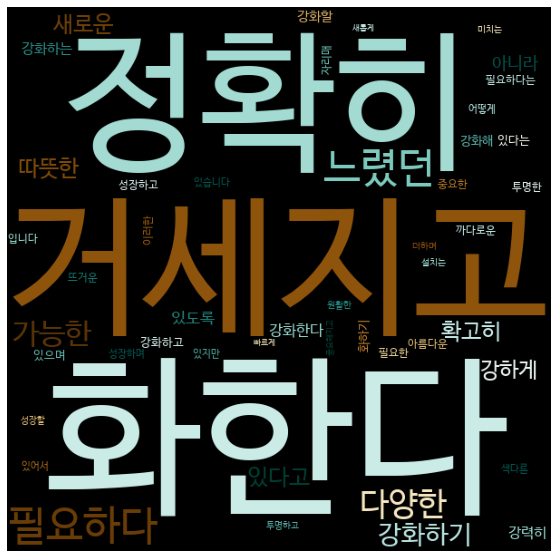

In [111]:
# 단어의 출현 횟수 카운트

counts3 = Counter(result)
words3 = counts3.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출

# 워드 클라우드 (colormap style을 변경)
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

#폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

wordcloud = WordCloud(font_path='NanumBarunGothic',
                      colormap = 'BrBG',
                      width=600,
                      height=600)

print()
print('딕셔너리 형태 출력')
print(dict(words3))

# 워드 클라우드 print
cloud = wordcloud.generate_from_frequencies(dict(words3))
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(10, 10))
plt.axis('off')   
plt.imshow(cloud)
plt.show()

## (2)-3 ESG 기사 내용 [동사] wordcloud 그리기
### 세 음절 이상 추출, stopwords 필터링 수행

In [112]:
# 형태소 분석 후 동사만 추출

verb_list = []

for sentence3 in sentences_tag2:
    for word3, tag3 in sentence3:
        if tag3 in ['Verb']:               
            verb_list.append(word3)

print('동사 추출')           
print(verb_list)


동사 추출
['열고', '하는', '했다고', '밝혔다', '높아지고', '쉽게', '할', '해', '될', '되는', '해사', '해', '나가는', '출', '키워가면서', '하는', '하겠다', '했다', '할', '된', '늘었다', '늘었다', '가', '나섰다', '는', '할', '만들고', '할', '비전', '한', '비전', '는', '는', '받는', '오는', '할', '만들고', '되도록', '아끼지', '않겠다고', '밝혔다', '는', '할', '하면서', '도를', '높여', '왔다', '출', '키워가면서', '가하고', '않은', '하며', '해사', '힘쓴다', '한다고', '밝혔다', '되고', '챌', '높아질', '는', '손잡고', '하기', '내는', '챌', '이어', '갈', '만든', '펼쳐', '할', '할', '했다', '는', '되는', '합니다', '딴', '한', '나선다', '산하에', '하는', '되자', '내놓았는데', '띄는', '되는', '쉽게', '할', '밝혔다', '몰려', '했다고', '밝혔다', '된', '들어설', '하기로', '했다고', '했다', '인당', '할', '두고', '했다', '밝혔다', '한다', '될', '하기에', '꺼낸', '만나는', '가', '잘', '차려입은', '하고', '합니다', '해', '할', '걸친', '해', '나가겠다', '했다', '이뤄', '출해', '나갈', '사들이', '해', '했다', '올', '했다', '이어', '따르면', '했다', '걷어', '붙였다', '했다', '가', '대', '한다', '벌어지고', '는', '보니', '난다', '하는', '한다', '는', '되고', '해야', '하는지는', '할지는', '모르는', '하는', '이는', '됩니다', '딴', '이었다', '한', '가', '하는', '됐다', '비전에', '맞춰', '하기', '사를', '나선다', '손잡고', '밝혔다', '빠져', '하는', '맞

In [113]:

# 동사 중에서 세음절 이상 단어만 추출 

print('전체 동사의 수: ', len(verb_list))
print() 

verb_list = [word for word in verb_list if len(word) > 2]    # 명사중에서 세음절 이상의 단어  추출

print('세음절 이상의 동사의 수: ', len(verb_list))
print() 


전체 동사의 수:  33123

세음절 이상의 동사의 수:  11765



In [114]:

# 불용어 제거하기
result = []

for w in verb_list: 
	if w not in stop_words: 
		result.append(w) 

print('불용어 제거한 형용사 리스트: ')
print(result)


불용어 제거한 형용사 리스트: 
['했다고', '밝혔다', '높아지고', '나가는', '키워가면서', '하겠다', '늘었다', '늘었다', '나섰다', '만들고', '만들고', '되도록', '아끼지', '않겠다고', '밝혔다', '하면서', '키워가면서', '가하고', '힘쓴다', '한다고', '밝혔다', '높아질', '손잡고', '합니다', '나선다', '산하에', '내놓았는데', '밝혔다', '했다고', '밝혔다', '들어설', '하기로', '했다고', '밝혔다', '하기에', '만나는', '차려입은', '합니다', '나가겠다', '사들이', '따르면', '붙였다', '벌어지고', '하는지는', '할지는', '모르는', '됩니다', '이었다', '비전에', '나선다', '손잡고', '밝혔다', '떨어지고', '차전지', '했습니다', '한다고', '가졌다', '가하고', '펼쳐오던', '하여야', '손잡고', '이끌어내고', '나아가', '들어가', '됩니다', '한다고', '밝혔다', '한다고', '밝혔다', '가하고', '높이는', '바꾼다', '정해질', '하겠다', '밝혔다', '하겠다', '했다고', '밝혔다', '전해졌다', '떠오르면서', '나서는', '하면서', '멀어져', '높아지고', '떠오른', '일으키고', '앞장서며', '나섰다', '산하에', '했다고', '밝혔다', '되면서', '끝나지', '해서는', '합니다', '일컫는', '이어지고', '한다고', '밝혔다', '했다는', '따르면', '앞장서겠다고', '애쓰자', '앞장선다고', '밝혔다', '애쓰자', '가한다고', '밝혔다', '나선다', '살리기', '나섰다', '했다고', '밝혔다', '밝혔다', '들어설', '하기로', '했다고', '밝혔다', '하기에', '만나는', '차려입은', '합니다', '손잡고', '하겠다는', '합니다', '나가겠다', '나선다', '사들이', '따르면', '나선다', '나가는', '나섰다', '벌어지고', '나선다고', '밝혔다', '


딕셔너리 형태 출력
{'밝혔다': 2288, '했다고': 1443, '하고자': 558, '하면서': 534, '산하에': 516, '앞장서는': 510, '받아야': 504, '하려는': 501, '맺었다고': 495, '없애는': 491, '업계였지만': 491, '잡아가면서': 491, '하기로': 175, '한다고': 152, '선보이면서': 111, '따르면': 105, '나섰다': 95, '애쓰자': 70, '사들이': 69, '비전을': 63, '나선다': 61, '하겠다는': 54, '하겠다': 51, '걸었다': 44, '이었으나': 43, '시키고': 43, '떠오른': 38, '나누는': 36, '앞장서고': 33, '손잡고': 30, '가하고': 28, '했으며': 28, '떠올랐다': 26, '나아가': 25, '하도록': 25, '살리기': 23, '받았다': 23, '나서고': 23, '하겠다고': 23, '살리는': 22, '나왔다': 21, '가한다': 21, '나타났다': 20, '했습니다': 18, '늘었다': 17, '떠오르면서': 17, '되면서': 17, '펼치며': 17, '앞장선다': 16, '벌어지는': 16}



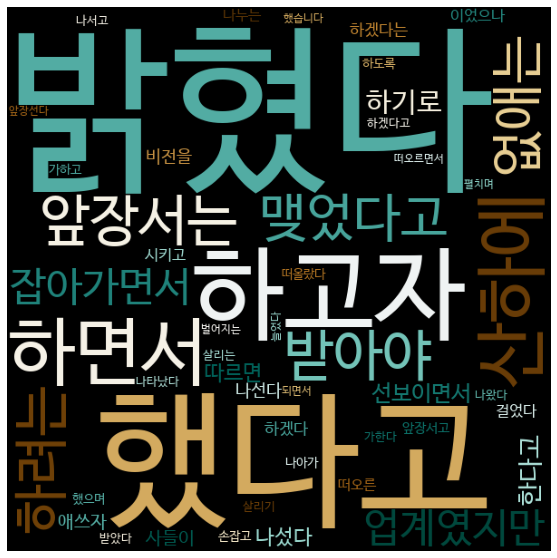

In [115]:

# 단어의 출현 횟수 카운트
counts3 = Counter(result)
words3 = counts3.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출
#print(words3)

# 워드 클라우드 (colormap style을 변경)
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

#폰트 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

wordcloud = WordCloud(font_path='NanumBarunGothic',
                      colormap = 'BrBG',
                      width=600,
                      height=600)
print('')
print('딕셔너리 형태 출력')
print(dict(words3))
print()

# 워드 클라우드 print
cloud = wordcloud.generate_from_frequencies(dict(words3))
plt.rcParams['font.family'] = 'NanumBarunGothic'

plt.figure(figsize=(10, 10))
plt.axis('off')   
plt.imshow(cloud)
plt.show()


## 추가 실험 결과
* 형용사와 동사에 대해서 세 음절 이상 단어와 불용어 사전으로 필터링을 했음
* 하지만 화한다, 하고자, 했다고 등이 주로 나온 것으로 보아 동사 분석에 비해서 유의미하다고 볼 수는 없음
* 불용어 사전의 데이터를 더 모으고, stemmer/lemmatization 등을 해본다면 더 유용한 정보를 얻을 수 있을 것이라고 기대됨